In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log2
from scipy.special import comb

In [2]:
p_h, p_t = 0.8, 0.2
N = [10, 50]
deltas = np.linspace(0, 1, num=50, endpoint=True)

In [3]:
def essential_bit_content(p, N, deltas):
    if 1 - p > p:
        p = 1 - p
        
    probs = []
    for k in range(N + 1):
        p_N_k = (p ** k) * ((1 - p) ** (N - k))
        probs.extend([p_N_k for _ in range(int(comb(N, k)))])  # ascending order
    
    avg_essential_bit_contents = []
    for delta in deltas:
        while sum(probs[1:]) > 1 - delta:
            probs.pop(0)
        avg_essential_bit_contents.append(log2(len(probs)) / N)
        
    return deltas, avg_essential_bit_contents


def plot_essential_bit_content(D, H, N):
    plt.figure(figsize=(10, 6))
    plt.scatter(D, H, s=0.1)
    for i in range(len(D) - 1):
        xs = np.linspace(D[i], D[i + 1], endpoint=True)
        plt.plot(xs[:-1], np.repeat(H[i], len(xs) - 1), 'r')
        ys = np.linspace(H[i], H[i + 1], endpoint=True)
        plt.plot(np.repeat(D[i + 1], len(ys) - 1), ys[:-1], 'r')

Text(0, 0.5, 'Normalised Essential Bit Content')

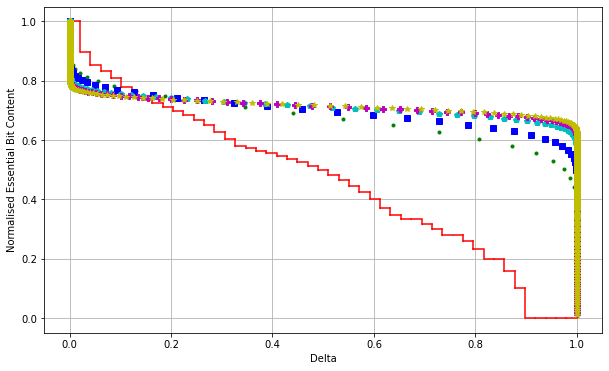

In [4]:
N = [100, 200, 500, 800, 1010]
colors = ['g', 'b', 'c', 'm', 'y']
markers = ['.', 's', 'p', 'P', '*']


def plot_essential_bit_content2(p, N, c, m):
    n_total = 0
    for i in range(N):
        n_total += int(comb(N, i))
    if 1 - p > p:
        p = 1 - p
    delta = 0
    for k in range(N + 1):
        p_N_k = (p ** k) * ((1 - p) ** (N - k))
        n_p_N_k = int(comb(N, k))
        delta += p_N_k * n_p_N_k
        n_total -= n_p_N_k
        if n_total == 0:
            break
        avg_essential_bit_content = log2(n_total) / N
        plt.plot(delta, avg_essential_bit_content, c=c, marker=m)


D, H = essential_bit_content(p_h, 10, deltas)
plot_essential_bit_content(D, H, 10)
for n, c, m in zip(N, colors, markers):
    plot_essential_bit_content2(p_h, n, c, m)
plt.grid()
plt.xlabel("Delta")
plt.ylabel("Normalised Essential Bit Content")